In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [8]:
df1 = pd.read_csv('exercise.csv')
df1.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [20]:
df2 =  pd.read_csv('calories.csv')
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [13]:
df = pd.concat([df1, df2], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


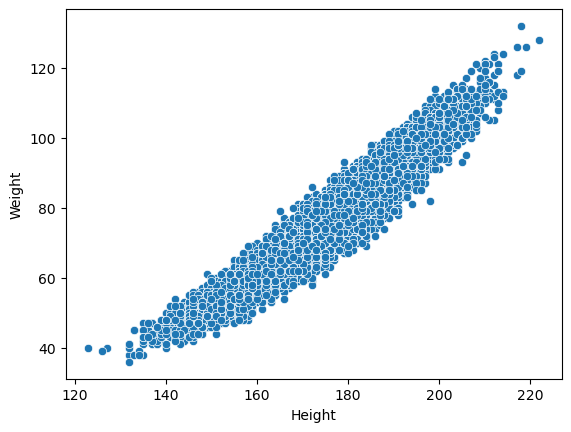

In [11]:
sb.scatterplot(df['Height'], df['Weight'])
plt.show()


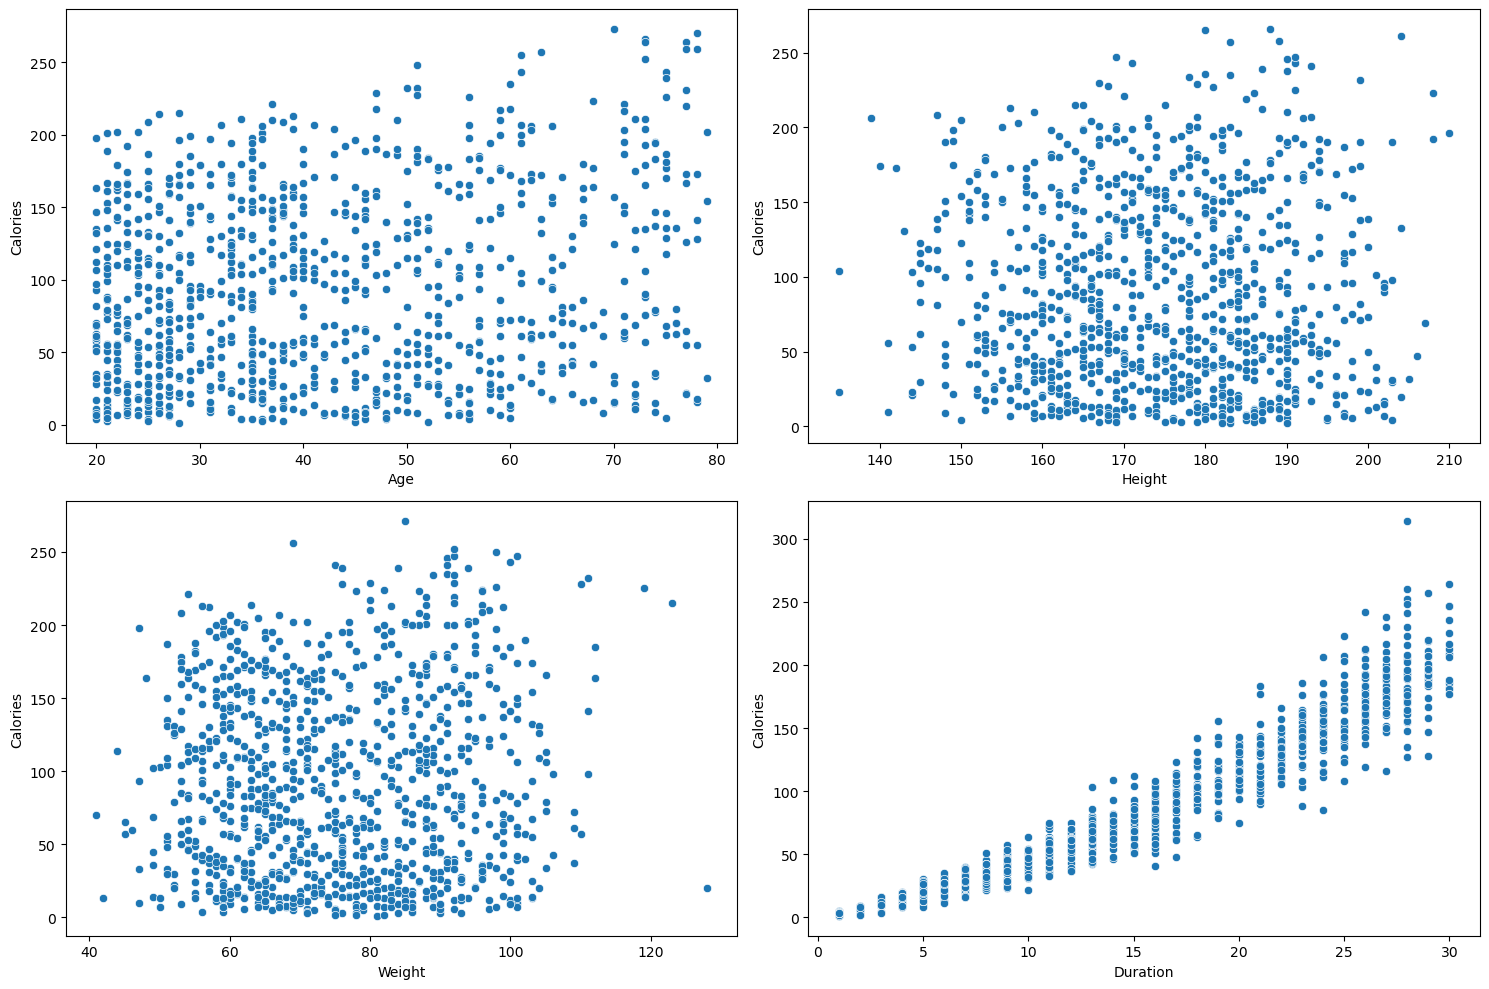

In [12]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x[col], x['Calories'])
plt.tight_layout()
plt.show()


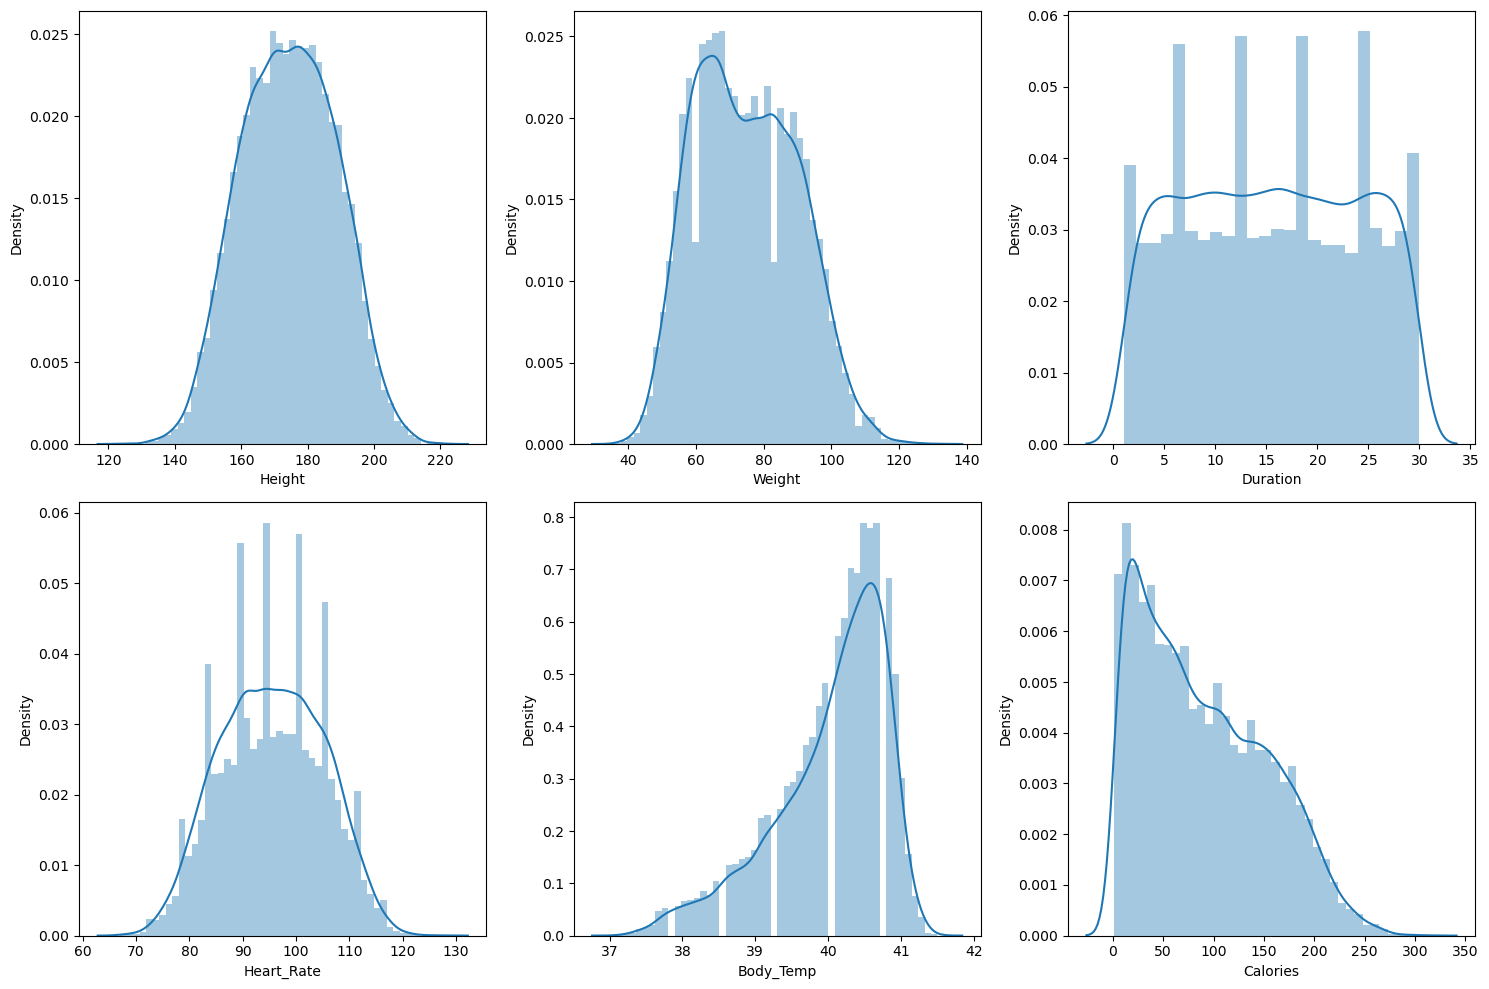

In [14]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


In [15]:
df.replace({'male': 0, 'female': 1},
		inplace=True)
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [16]:
to_remove = ['Weight', 'Duration', 'User_ID']
df.drop(to_remove, axis=1, inplace=True)


In [17]:
df.head()

,Gender,Age,Height,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,105.0,40.8,231.0
1,1,20,166.0,94.0,40.3,66.0
2,0,69,179.0,88.0,38.7,26.0
3,1,34,179.0,100.0,40.5,71.0
4,1,27,154.0,81.0,39.8,35.0


In [21]:
features = df.drop(['Calories'], axis=1)
target = df['Calories'].values
  
X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

In [22]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [23]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]
  
for i in range(5):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
  
    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))
  
    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  7.846022438376038
Validation Error :  10.153954134742419

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.9950333622